# Projet

Le projet consiste à prévoir le nombre de vélos loués à chaque heure dans des bornes libres-services de la ville (système type Vélib'). La variable cible est ici la variable **count**.

Voici un descriptif de l'ensemble des variables :
* *datetime* - date et heure du relevé 
* *season* - 1 = printemps , 2 = été, 3 = automne, 4 = hiver 
* *holiday* – indique si le jour est un jour de vacances scolaires 
* *workingday* - indique si le jour est travaillé (ni week-end ni vacances) 
* *weather* - 1: Dégagé à nuageux, 2 : Brouillard, 3 : Légère pluie ou neige, 4 : Fortes averses ou neiges 
* *temp* – température en degrés Celsius 
* *atemp* – température ressentie en degrés Celsius 
* *humidity* – taux d’humidité 
* *windspeed* – vitesse du vent 
* *casual* - nombre de locations d’usagers non abonnés 
* *registered* – nombre de locations d’usagers abonnés 
* *count* – nombre total de locations de vélos 

L'objectif du projet est de mener à bien la création d'un modèle qui pourrait théoriquement être déployé en production. Les étapes d'exploration des données, de traitement et de preprocessing ne sont bien entendu pas à négliger. Il ne s'agit pas d'une compétition de type *Kaggle*, le projet ne sera pas uniquement noté sur la performance du modèle, mais plutôt sur votre approche complète et la justification de chacun de vos choix.

Comme vu durant le cours, soyez faites attention à certains points :
- quel type de problème dois-je traiter ?
- feature engineering : est-ce que j'utilise les données correctement, toutes les données ?
- data leakage : est-ce qu'une de mes features n'est pas trop explicative ?
- ai-je bien traité toutes les données correctement ?
- est-ce que mon modèle est adapté ?
- etc, etc, etc

Soyez vigilant à expliquer et justifier votre démarche à l'aide de visualisation, de commentaires dans vos codes (pensez aux cellules markdown), etc

In [41]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [42]:
df = pd.read_csv("../data/input/velo.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### Analyse de la structure du dataframe

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Analyse descriptive des données

In [44]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


Nombre de valeurs uniques par colonnes

In [45]:
df.apply(lambda x: len(x.unique()))

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

#### Split de la colonne datetime en year, month, day, time afin de pouvoir analyser les variables indépendamment

In [46]:
df["datetime"] = pd.to_datetime(df["datetime"])
df['year'] = df["datetime"].dt.year
df['month'] = df["datetime"].dt.month
df['day'] = df["datetime"].dt.day
df['hour'] = df["datetime"].dt.hour
df = df.drop(columns=["datetime"])

In [47]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,11.541613
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608,6.915838
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,6.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,10.000000,12.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,15.000000,18.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000,23.000000


In [48]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


#### Les colonnes weather et season sont catégorisées comme numérique / continue alors qu'il s'agit de variable qualitative / discrète

In [49]:
df[["weather", "season"]] = df[["weather", "season"]].astype("category")

##### Premières analyses : nous obtenons 6 variables catégorielles, 8 variables numériques et une variable cible numérique

### Ajout de quelques graphiques

##### Analyse de la distribution de la cible afin de repérer la part des outliers

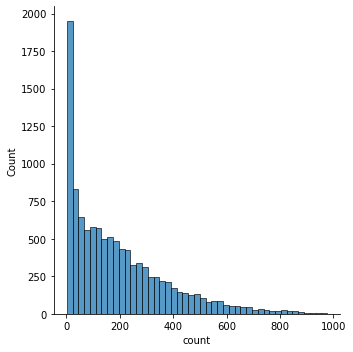

In [50]:
sns.displot(df["count"])

<AxesSubplot:xlabel='count'>

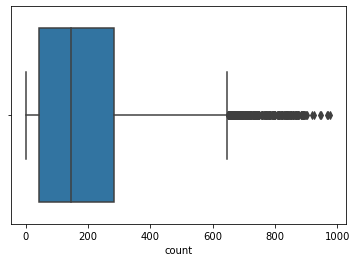

In [51]:
sns.boxplot(x=df["count"])

##### Analyse des autres variables

[Text(0.5, 1.0, 'Nombre de vélos loués toutes les heures, on note un pic à 8h et 17h/18h')]

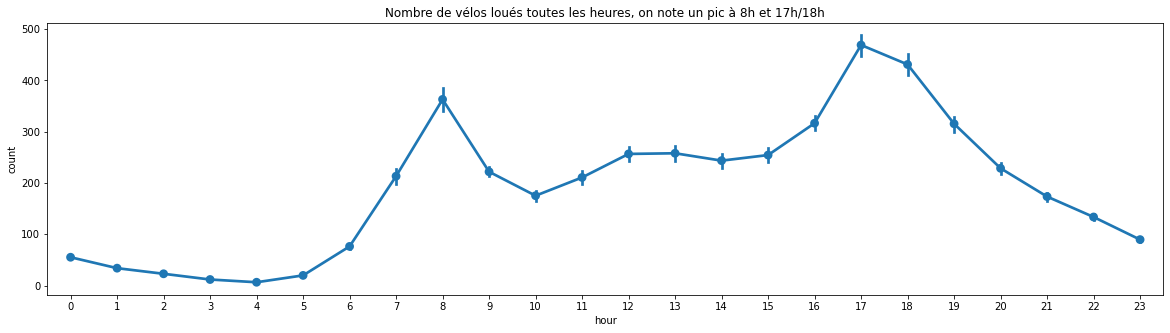

In [52]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=df, x='hour', y='count', ax=ax)
ax.set(title='Nombre de vélos loués toutes les heures, on note un pic à 8h et 17h/18h')

[Text(0.5, 1.0, 'Total par heure des vélos loués en fonction des mois, les vélos sont plus loués les mois d été et du début de lautomne')]

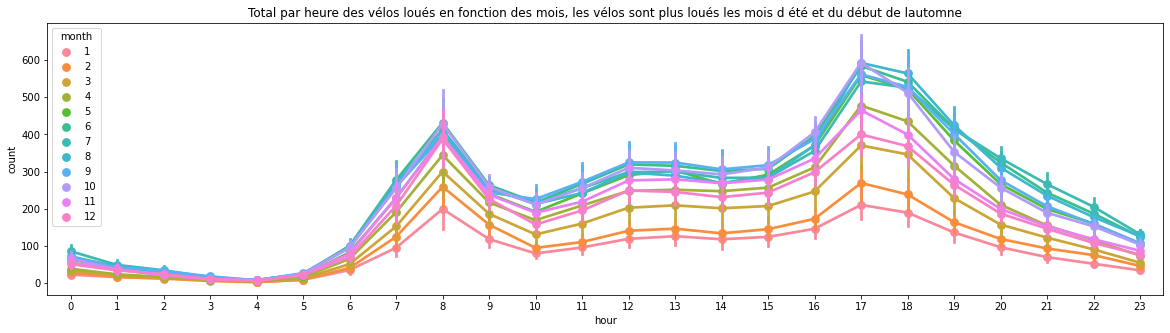

In [53]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=df, x='hour', y='count', hue='month', ax=ax)
ax.set(title='Total par heure des vélos loués en fonction des mois, les vélos sont plus loués les mois d été et du début de lautomne')

[Text(0.5, 1.0, 'Nombre de vélos loués en fonction des différents temps les vélos sont plus loués lors des temps favorables')]

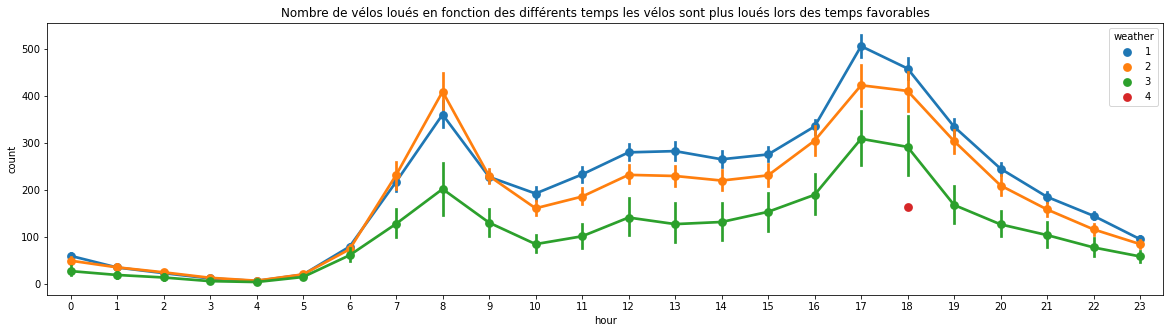

In [54]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=df, x='hour', y='count', hue='weather', ax=ax)
ax.set(title='Nombre de vélos loués en fonction des différents temps les vélos sont plus loués lors des temps favorables')

[Text(0.5, 1.0, 'Nombre de vélos loués en fonction des différentes saisons, les vélos sont moins loués en hiver')]

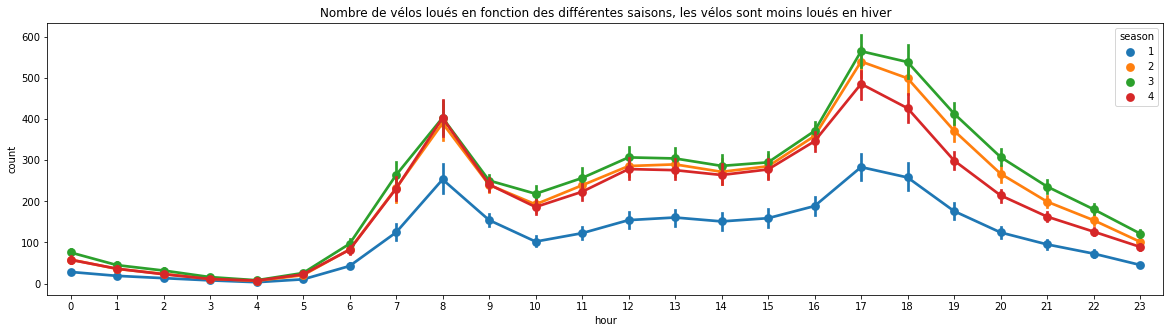

In [55]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=df, x='hour', y='count', hue='season', ax=ax)
ax.set(title='Nombre de vélos loués en fonction des différentes saisons, les vélos sont moins loués en hiver')

[Text(0.5, 1.0, 'Nombre de vélos loués en fonction des saisons')]

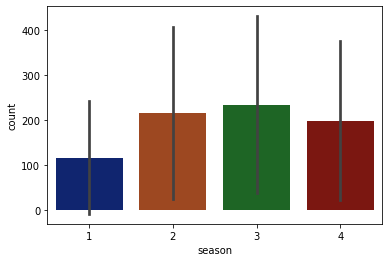

In [56]:
sns.barplot(data=df, x='season', y='count', ci="sd", palette="dark")
ax.set(title='Nombre de vélos loués en fonction des saisons')

[Text(0.5, 1.0, 'Nombre de vélos loués en fonction des temps')]

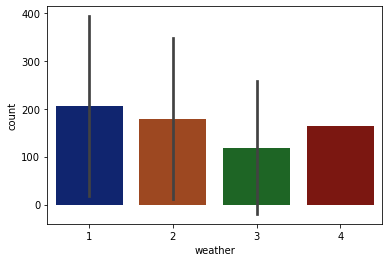

In [57]:
sns.barplot(data=df, x='weather', y='count', ci="sd", palette="dark")
ax.set(title='Nombre de vélos loués en fonction des temps')

##### Analyse des corrélations afin de voir s'il faudra réduire le nombre de dimension

<AxesSubplot:>

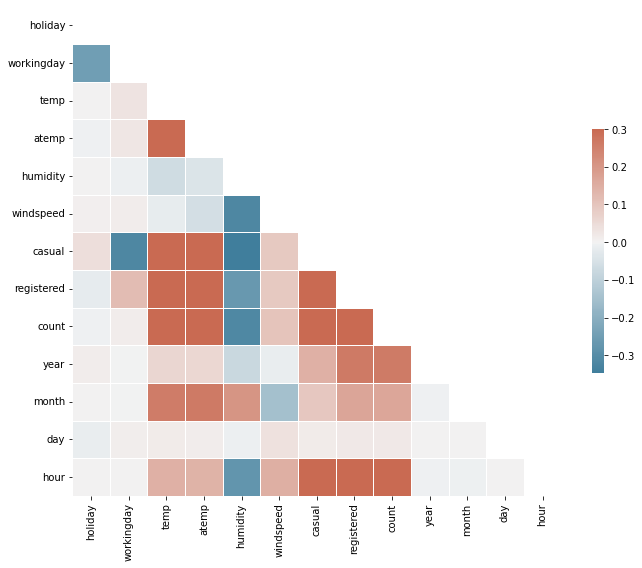

In [58]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

##### Les colonnes atemp / temp sont fortement positivement corrélées et les colonnes workingday / holiday sont fortement négativement corrélées, je décide donc de supprimer les colonnes atemp et holiday. La colonne cible count correspond à la somme des colonnes registered et casual, je décide donc également de ne pas concerver ces colonnes 

In [59]:
df = df.drop(columns=["atemp", "holiday", "casual", "registered"])

##### Dans le premier graphique, nous observons des outliers, nous allons les supprimer grâce à la médiane et l'écart interquartile

Shape initiale: (10886, 11)
Shape après avoir supprimer les outliers: (10586, 11)


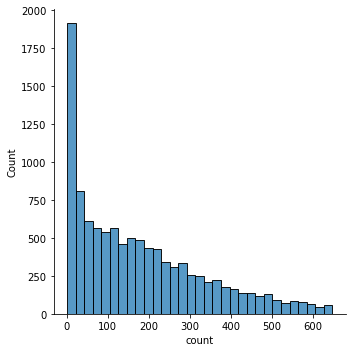

In [60]:
print("Shape initiale: {}".format(df.shape))
q1 = df["count"].quantile(0.25)
q3 = df["count"].quantile(0.75)
iqr = q3 - q1
df = df.loc[(df["count"] >=  q1 -(1.5 * iqr) ) & (df["count"] <= q3 +(1.5 * iqr) )]
print("Shape après avoir supprimer les outliers: {}".format(df.shape))
sns.displot(df["count"])

In [61]:
df.describe()

,workingday,temp,humidity,windspeed,count,year,month,day,hour
count,10586.000000,10586.000000,10586.000000,10586.000000,10586.000000,10586.000000,10586.000000,10586.000000,10586.000000
mean,0.676459,20.061494,62.165124,12.776699,175.717079,2011.487814,6.494804,9.977045,11.456641
std,0.467849,7.781496,19.231315,8.173430,156.360023,0.499875,3.464977,5.475961,6.960409
min,0.000000,0.820000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000
25%,0.000000,13.940000,47.000000,7.001500,40.000000,2011.000000,3.000000,5.000000,5.000000
50%,1.000000,20.500000,62.000000,12.998000,138.000000,2011.000000,6.000000,10.000000,11.000000
75%,1.000000,26.240000,78.000000,16.997900,270.000000,2012.000000,10.000000,15.000000,18.000000
max,1.000000,41.000000,100.000000,56.996900,647.000000,2012.000000,12.000000,19.000000,23.000000


### Préparation du dataset pour mettre en place les algorithmes

In [62]:
from prettytable import PrettyTable
import xgboost as xgb

# Sklearn metrics for regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Sklearn regression models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import LinearRegression

#### Catégorisation des variables

Les colonnes de type "category" doivent être dummifiées, on utilise le paramètre drop_first=True car il est induit que si les x-1 colonnes sont à 0 alors la dernière est à 1. Cela réduit le nombre de colonnes. 

Les variables weather et season sont catégorisées commme numériques : l'encodage est purement numérique, cela correspond à de la factorisation. Cela peut poser problème car l'algorithme assumera que deux valeurs proches sont plus similaires que deux valeurs éloignées, ce qui n'est pas forcément le cas. C'est pourquoi les variables sont dummifiées. 

Les variables year, month, day et hour n'ont pas été encodées car elles sont de nature cycliques et elles ont beaucoup de valeurs différentes. Les dummifier augmenterait considérablement le nombre de variables. C'est pourquoi la conversion des valeurs en sin/cos est pertinente. En effet, de cette manière, l'algorithme considèrera les heures 0 et 23 comme étant proches.

In [63]:
import math

def transformation(column):
    max_value = column.max()
    sin_values = [math.sin((2*math.pi*x)/max_value) for x in list(column)]
    cos_values = [math.cos((2*math.pi*x)/max_value) for x in list(column)]
    return sin_values, cos_values

In [64]:
df["day_sin"] = transformation(df["day"])[0]
df["month_sin"] = transformation(df["month"])[0]
df["hour_sin"] = transformation(df["hour"])[0]
df["day_cos"] = transformation(df["day"])[1]
df["month_cos"] = transformation(df["month"])[1]
df["hour_cos"] = transformation(df["hour"])[1]

Préparation d'un dictionnaire afin de pouvoir remplacer à posteriori les valeurs cos par les heures et pouvoir visualiser graphiquement le nombre de vélos prédit par heure

In [65]:
hour = list(df["hour"])
hour_cos = list(df["hour_cos"])
hour_dict = dict(zip(hour_cos, hour))
hour_dict

{1.0: 23,
 0.9629172873477994: 1,
 0.8544194045464886: 21,
 0.6825531432186541: 20,
 0.4600650377311522: 4,
 0.20345601305263375: 5,
 -0.06824241336467088: 6,
 -0.33487961217098616: 7,
 -0.5766803221148671: 8,
 -0.7757112907044197: 9,
 -0.917211301505453: 10,
 -0.9906859460363306: 11,
 -0.9906859460363308: 12,
 -0.9172113015054529: 13,
 -0.7757112907044198: 14,
 -0.5766803221148672: 15,
 -0.3348796121709864: 16,
 -0.06824241336467046: 17,
 0.2034560130526333: 18,
 0.4600650377311516: 19,
 0.962917287347799: 22}

In [66]:
df = df.drop(columns=["day", "month", "hour"])
df

,season,workingday,weather,temp,humidity,windspeed,count,year,day_sin,month_sin,hour_sin,day_cos,month_cos,hour_cos
0,1,0,1,9.84,81,0.0000,16,2011,3.246995e-01,5.000000e-01,0.000000e+00,0.945817,0.866025,1.000000
1,1,0,1,9.02,80,0.0000,40,2011,3.246995e-01,5.000000e-01,2.697968e-01,0.945817,0.866025,0.962917
2,1,0,1,9.02,80,0.0000,32,2011,3.246995e-01,5.000000e-01,5.195840e-01,0.945817,0.866025,0.854419
3,1,0,1,9.84,75,0.0000,13,2011,3.246995e-01,5.000000e-01,7.308360e-01,0.945817,0.866025,0.682553
4,1,0,1,9.84,75,0.0000,1,2011,3.246995e-01,5.000000e-01,8.878852e-01,0.945817,0.866025,0.460065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,1,1,15.58,50,26.0027,336,2012,-2.449294e-16,-2.449294e-16,-8.878852e-01,1.000000,1.000000,0.460065
10882,4,1,1,14.76,57,15.0013,241,2012,-2.449294e-16,-2.449294e-16,-7.308360e-01,1.000000,1.000000,0.682553
10883,4,1,1,13.94,61,15.0013,168,2012,-2.449294e-16,-2.449294e-16,-5.195840e-01,1.000000,1.000000,0.854419
10884,4,1,1,13.94,61,6.0032,129,2012,-2.449294e-16,-2.449294e-16,-2.697968e-01,1.000000,1.000000,0.962917


In [67]:
df_with_dummies= pd.get_dummies(df, columns=["weather", "season"], drop_first=True)
df_with_dummies.head()

,workingday,temp,humidity,windspeed,count,year,day_sin,month_sin,hour_sin,day_cos,month_cos,hour_cos,weather_2,weather_3,weather_4,season_2,season_3,season_4
0,0,9.84,81,0.0,16,2011,0.324699,0.5,0.000000,0.945817,0.866025,1.000000,0,0,0,0,0,0
1,0,9.02,80,0.0,40,2011,0.324699,0.5,0.269797,0.945817,0.866025,0.962917,0,0,0,0,0,0
2,0,9.02,80,0.0,32,2011,0.324699,0.5,0.519584,0.945817,0.866025,0.854419,0,0,0,0,0,0
3,0,9.84,75,0.0,13,2011,0.324699,0.5,0.730836,0.945817,0.866025,0.682553,0,0,0,0,0,0
4,0,9.84,75,0.0,1,2011,0.324699,0.5,0.887885,0.945817,0.866025,0.460065,0,0,0,0,0,0


#### Analyse des valeurs nulles, il n'y aucune valeur nulle dans le jeu de données, aucune imputation n'est nécessaire

In [68]:
df_with_dummies.isna().sum()

workingday    0
temp          0
humidity      0
windspeed     0
count         0
year          0
day_sin       0
month_sin     0
hour_sin      0
day_cos       0
month_cos     0
hour_cos      0
weather_2     0
weather_3     0
weather_4     0
season_2      0
season_3      0
season_4      0
dtype: int64

#### Séparation du dataframe en train et test

In [69]:
y = df_with_dummies["count"]
x = df_with_dummies.drop(columns=["count"])

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x ,y, test_size = 0.20, random_state = 2)

#### Comparaison de plusieurs algorithmes et choix des modèles

Le dataset a les charactérisques suivantes : 
- La variable cible est quantitative : je ne vais tester que des modèles de régression 
- Le jeu de données n'est pas très lourd
- Seules quelques features sont importantes comme nous avons pu le voir dans la matrice de corrélation, beaucoup sont corrélées 

In [71]:
table = PrettyTable()
table.field_names = ["Model", "Mean Squared Error", "R² score"]

models = [
    LinearRegression(),
    DecisionTreeRegressor(random_state=0),
    GradientBoostingRegressor(random_state=0),
    xgb.XGBRegressor(verbosity=0),
    RandomForestRegressor(random_state=0, n_estimators=300)
]

for model in models:
    model.fit(x_train, y_train) 
    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    table.add_row([type(model).__name__, format(mse, '.2f'), format(r2, '.2f')])

In [72]:
table

Model,Mean Squared Error,R² score
LinearRegression,11818.89,0.52
DecisionTreeRegressor,3582.65,0.86
GradientBoostingRegressor,4157.84,0.83
XGBRegressor,1529.82,0.94
RandomForestRegressor,1935.95,0.92


### Random Forest
Comme nous le voyons dans le tableau ci-dessus, le score R², qui évalue la performance du modèle est le plus élevé des modèles choisis, 89% de la variance de la variable count s’explique par les features. L'erreur quadratique moyenne est aussi la plus faible, cela correspond à la différence entre la prédiction et le réel.


In [73]:
from sklearn.model_selection import GridSearchCV

##### Fine tune our model

In [74]:
param_grid = [
    {"n_estimators": [10, 100, 300], "max_features": [10, 15, 17]}, 
    {"bootstrap":[False], "n_estimators": [100, 300, 500], "max_features": [5, 10, 15]}
    ]


model = RandomForestRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train) 

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [10, 15, 17],
                          'n_estimators': [10, 100, 300]},
                         {'bootstrap': [False], 'max_features': [5, 10, 15],
                          'n_estimators': [100, 300, 500]}],
             scoring='neg_mean_squared_error')

In [75]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 10, 'n_estimators': 500}

In [76]:
table = PrettyTable()
table.field_names = ["Model", "Dataset", "MSE", 'RMSE', "R² score", "MAE"]
features = list(x.columns)

model = RandomForestRegressor(bootstrap=False, max_features=10, n_estimators=500).fit(x_train, y_train) 

def evaluate(x, y, dataset):
    y_pred = model.predict(x)

    mse = mean_squared_error(y, y_pred)
    score = model.score(x, y)    
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)

    table.add_row([type(model).__name__, dataset, format(mse, '.2f'), format(rmse, '.2f'), format(score, '.2f'), format(mae, '.2f')])
    
evaluate(x_train, y_train, 'training')
evaluate(x_test, y_test, 'validation')

table

Model,Dataset,MSE,RMSE,R² score,MAE
RandomForestRegressor,training,0.00,0.00,1.00,0.00
RandomForestRegressor,validation,1787.22,42.28,0.93,27.78


Nous voyons que le modèle overfit, c'est le risque lorsqu'on utilise des modèles de random forest. Il n'est pas assez général, et "colle" trop aux données d'entrainement.

Feature ranking:
1. feature hour_sin (0.341578)
2. feature hour_cos (0.229951)
3. feature temp (0.122911)
4. feature workingday (0.081563)
5. feature year (0.066297)
6. feature humidity (0.044233)
7. feature month_sin (0.031974)
8. feature weather_3 (0.014390)
9. feature day_sin (0.013917)
10. feature windspeed (0.013516)
11. feature month_cos (0.012824)
12. feature day_cos (0.010918)
13. feature season_4 (0.008918)
14. feature season_2 (0.002972)
15. feature weather_2 (0.002780)
16. feature season_3 (0.001256)
17. feature weather_4 (0.000003)


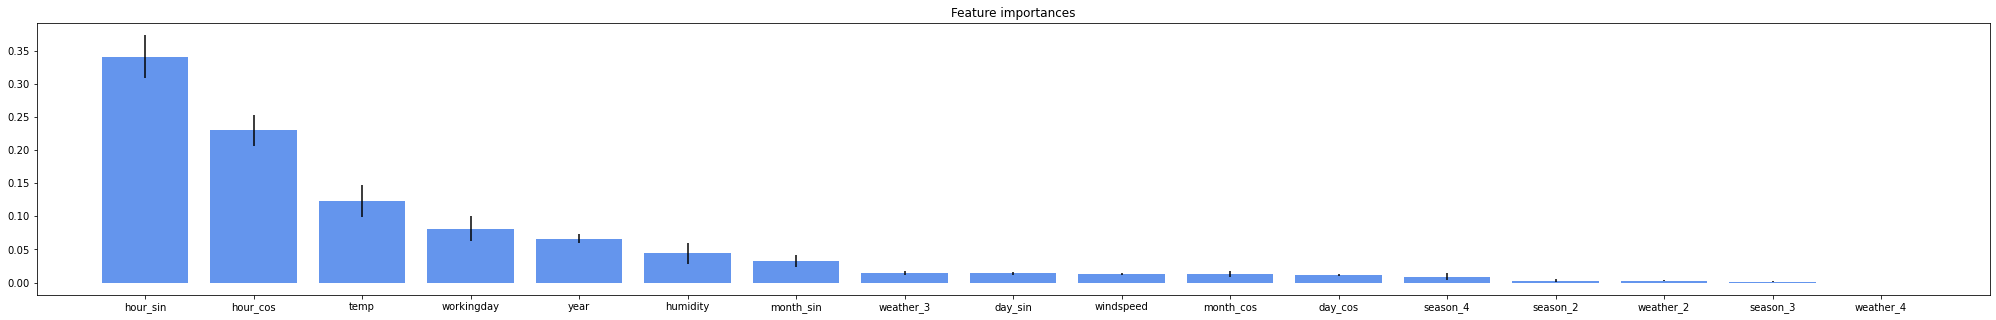

In [77]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(x_test.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

plt.figure(figsize=(35,5))
plt.title("Feature importances")
plt.bar(range(x_test.shape[1]), importances[indices], color="cornflowerblue", yerr=std[indices], align="center")
plt.xticks(range(x_test.shape[1]), [features[i] for i in indices])
plt.xlim([-1, x_test.shape[1]])
plt.show()

### XGBRegressor

In [78]:
param_grid = [
    {"n_estimators": [10, 200, 300], "max_depth": [0, 5, 10], "learning_rate":[0.015, 0.001, 0.02]}, 
    {"learning_rate":[0.01, 0.02, 0.03], "n_estimators": [200, 300, 500], "max_depth": [2, 4, 6]}
    ]


model_xgb = xgb.XGBRegressor()

grid_search = GridSearchCV(model_xgb, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train) 

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    val

In [79]:
grid_search.best_params_

{'learning_rate': 0.03, 'max_depth': 6, 'n_estimators': 500}

In [80]:
table = PrettyTable()
table.field_names = ["Model", "Dataset", "MSE", 'RMSE', "R² score", "MAE"]
features = list(x.columns)

model_xgb = xgb.XGBRegressor(verbosity=0, max_depth=6, n_estimators=500, learning_rate=0.03).fit(x_train, y_train) 

def evaluate(x, y, dataset):
    y_pred = model_xgb.predict(x)

    mse = mean_squared_error(y, y_pred)
    score = model_xgb.score(x, y)    
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)

    table.add_row([type(model_xgb).__name__, dataset, format(mse, '.2f'), format(rmse, '.2f'), format(score, '.2f'), format(mae, '.2f')])
    
evaluate(x_train, y_train, 'training')
evaluate(x_test, y_test, 'validation')

table

Model,Dataset,MSE,RMSE,R² score,MAE
XGBRegressor,training,795.43,28.20,0.97,19.10
XGBRegressor,validation,1548.69,39.35,0.94,25.31


Le modèle XGBRegressor obtient un très bon score R² sur le jeu d'entraînement, il overfit encore un peu les données. 

### GradientBoostingRegressor

In [81]:
gbr_params = {'n_estimators': 500,
          'max_depth': 6,
          'min_samples_split': 5,
          'learning_rate': 0.01}

table = PrettyTable()
table.field_names = ["Model", "Dataset", "MSE", 'RMSE', "R² score", "MAE"]

model_gbr = GradientBoostingRegressor(**gbr_params).fit(x_train, y_train) 

def evaluate(x, y, dataset):
    y_pred = model_gbr.predict(x)

    mse = mean_squared_error(y, y_pred)
    score = model_gbr.score(x, y)    
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)

    table.add_row([type(model_gbr).__name__, dataset, format(mse, '.2f'), format(rmse, '.2f'), format(score, '.2f'), format(mae, '.2f')])
    
evaluate(x_train, y_train, 'training')
evaluate(x_test, y_test, 'validation')

table

Model,Dataset,MSE,RMSE,R² score,MAE
GradientBoostingRegressor,training,1382.72,37.19,0.94,25.61
GradientBoostingRegressor,validation,2014.46,44.88,0.92,29.81


Avec ce modèle, les résultats sur les données d'entraînement et de test sont assez similaires, cela signifie que le modèle est plus général, même si le score du modèle est légèrement moins élevé, il est plus général. Le model DecisionTree a également été testé car les résultats étaient meilleurs, mais il overfittait vraiment les données. 
Le model RandomForestRegressor overfit également trop les données.

Le modèle que je décide de garder est celui ci. 

## Conclusion
Dans le premier modèle, les variables heures, jours et températures sont celles ayant le plus d'importance dans le modèle, plus de 75% du modèle est expliqué par ces trois variables. On cherche à prédire le nombre de vélos à allouer par heure. Comme on a pu l'observer dans les graphiques, on observe des pics le matin et en fin de journée.

In [82]:
y_test = np.array(y_test.values.tolist())

In [83]:
x_test["hour_cos"] = x_test["hour_cos"].replace(hour_dict)

[Text(0.5, 1.0, 'Nombre de vélos loués toutes les heures, on note un pic à 8h et 18h, en bleu la prédiction')]

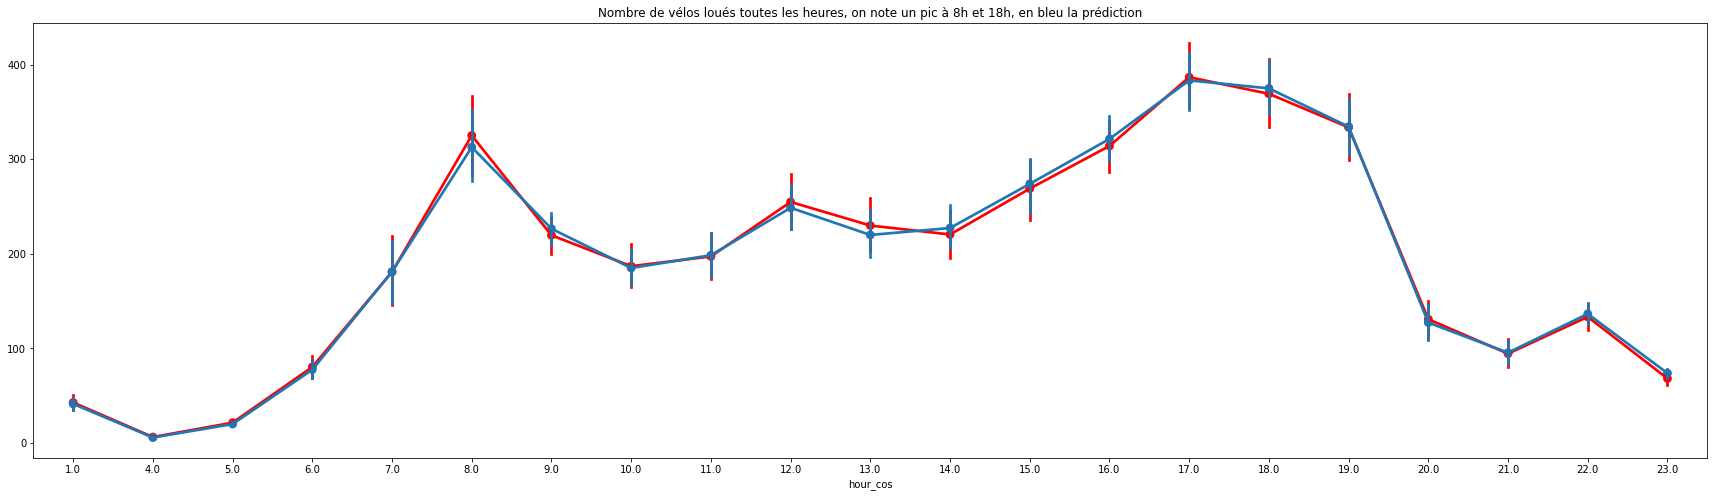

In [84]:
fig, ax = plt.subplots(figsize=(30,8))
sns.pointplot(x=x_test["hour_cos"], y=y_test, ax=ax, color='red')
sns.pointplot(x=x_test["hour_cos"], y=y_pred, ax=ax)
ax.set(title='Nombre de vélos loués toutes les heures, on note un pic à 8h et 18h, en bleu la prédiction')

In [85]:
jupyter-nbconvert --to PDFviaHTML GAYRAUD_EVA.ipynb

SyntaxError: invalid syntax (Temp/ipykernel_5568/479933117.py, line 1)